In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from IPython.display import Image

In [5]:
import hillmaker as hm

In [4]:
ssu_stopdata = '../data/ShortStay.csv'
stops_df = pd.read_csv(ssu_stopdata, parse_dates=['InRoomTS','OutRoomTS'])

In [18]:
list(stops_df)

['PatID', 'InRoomTS', 'OutRoomTS', 'PatType']

In [6]:
!hillmaker --config ssu_example.toml

2022-07-20 10:45:13,492 - hillmaker.bydatetime - INFO - min of intime: 1996-01-01 07:44:00
2022-07-20 10:45:13,492 - hillmaker.bydatetime - INFO - max of intime: 1996-09-30 22:45:00
2022-07-20 10:45:13,492 - hillmaker.bydatetime - INFO - min of outtime: 1996-01-01 08:50:00
2022-07-20 10:45:13,492 - hillmaker.bydatetime - INFO - max of outtime: 1996-09-30 23:35:00
2022-07-20 10:45:13,492 - hillmaker.bydatetime - INFO - start analysis: 1996-01-01T00:00:00.000000000, end analysis: 1996-09-30T23:59:59.000000000
2022-07-20 10:45:13,503 - hillmaker.bydatetime - INFO - min of entry time_bin = 7
2022-07-20 10:45:13,503 - hillmaker.bydatetime - INFO - max of exit time_bin = 6574 and num_bins=6576
2022-07-20 10:45:14,513 - hillmaker.bydatetime - INFO - cat IVT {'inner': 33179}
2022-07-20 10:45:14,567 - hillmaker.bydatetime - INFO - cat IVT num_arrivals_hm 33179 num_arrivals_stops 33179
2022-07-20 10:45:14,567 - hillmaker.bydatetime - INFO - cat IVT num_departures_hm 33179 num_departures_stops 33

In [7]:
occ_summary = pd.read_csv('./output/ssu_test_01_occupancy_dow_binofday.csv')
occ_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     168 non-null    int64  
 1   dow_name        168 non-null    object 
 2   bin_of_day      168 non-null    int64  
 3   bin_of_day_str  168 non-null    object 
 4   count           168 non-null    float64
 5   mean            168 non-null    float64
 6   min             168 non-null    float64
 7   max             168 non-null    float64
 8   stdev           168 non-null    float64
 9   sem             168 non-null    float64
 10  var             168 non-null    float64
 11  cv              168 non-null    float64
 12  skew            168 non-null    float64
 13  kurt            168 non-null    float64
 14  p25             168 non-null    float64
 15  p50             168 non-null    float64
 16  p75             168 non-null    float64
 17  p95             168 non-null    flo

In [3]:
style_list = ['default', 'classic'] + sorted(
    style for style in plt.style.available
    if style != 'classic' and not style.startswith('_'))

style_list

['default',
 'classic',
 'Solarize_Light2',
 'bmh',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [16]:
def make_occ_plot(occ_summary_df, style_label='default', bin_size_minutes=60):
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1)

    # Create a list to use as the X-axis values
    num_bins = 7 * 1440 / bin_size_minutes
    base_date_for_first_dow = '01/05/2015' # Pick any date with associated DOW you want to appear first on plot
    timestamps = pd.date_range(base_date_for_first_dow, periods=num_bins, freq=f'{bin_size_minutes}Min').tolist()

    # Choose appropriate major and minor tick locations
    major_tick_locations = pd.date_range(f'{base_date_for_first_dow} 12:00:00', periods=7, freq='24H').tolist()
    minor_tick_locations = pd.date_range(f'{base_date_for_first_dow} 06:00:00', periods=42, freq='4H').tolist()

    # Set the tick locations for the axes object
    ax1.set_xticks(major_tick_locations)
    ax1.set_xticks(minor_tick_locations, minor=True)
    #ax1.tick_params(which='both', direction='in')

    # Specify the mean occupancy and percentile values
    mean_occ = occ_summary_df['mean']
    pctile_occ = occ_summary_df['p95']

    # Styling of bars, lines, plot area
    # Style the bars for mean occupancy
    # bar_color = 'grey'
    # bar_opacity = 0.8

    # Style the line for the occupancy percentile
    pctile_line_style = '-'
    # pctile_color = 'black'
    # pctile_line_width = 1

    # Set the background color of the plot. Argument is a string float in
    # (0,1) representing greyscale (0=black, 1=white)
    # ax1.patch.set_facecolor('0.95')

    # Add data to the plot
    # Mean occupancy as bars - here's the GOTCHA involving the bar width
    bar_width = 1 / (1440 / bin_size_minutes)
    ax1.bar(timestamps, mean_occ, label='Mean occupancy', width=bar_width)

    # Some percentile as a line
    ax1.plot(timestamps, pctile_occ, linestyle=pctile_line_style, label='95th %ile occupancy')

    # Create formatter variables
    dayofweek_formatter = DateFormatter('%a')
    qtrday_formatter = DateFormatter('%H')

    # Format the tick labels
    ax1.xaxis.set_major_formatter(dayofweek_formatter)
    ax1.xaxis.set_minor_formatter(qtrday_formatter)

    # Slide the major tick labels underneath the default location by 20 points
    ax1.tick_params(which='major', pad=20)

    # Add other chart elements

    # Set plot and axis titles
    fig1.suptitle(f'SSU Occupancy by Time of Day and Day of Week\n{style_label}')
    ax1.set_title('All patient types')
    ax1.set_xlabel('Time Bin of Week')
    ax1.set_ylabel('Patients')

    # Gridlines
    ax1.grid(True, color='k')

    # Legend
    leg = ax1.legend(loc='best')
    #leg.get_frame().set_facecolor('white')

    # Plot size
    fig1.set_size_inches(12, 9)

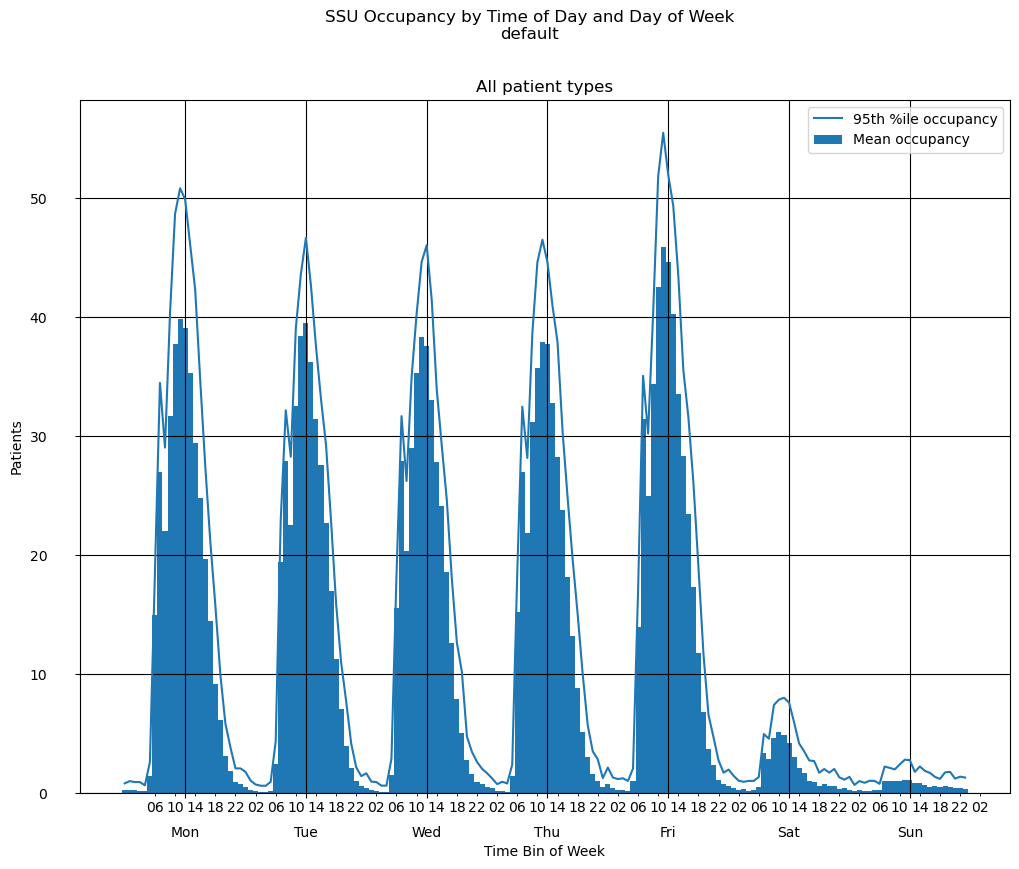

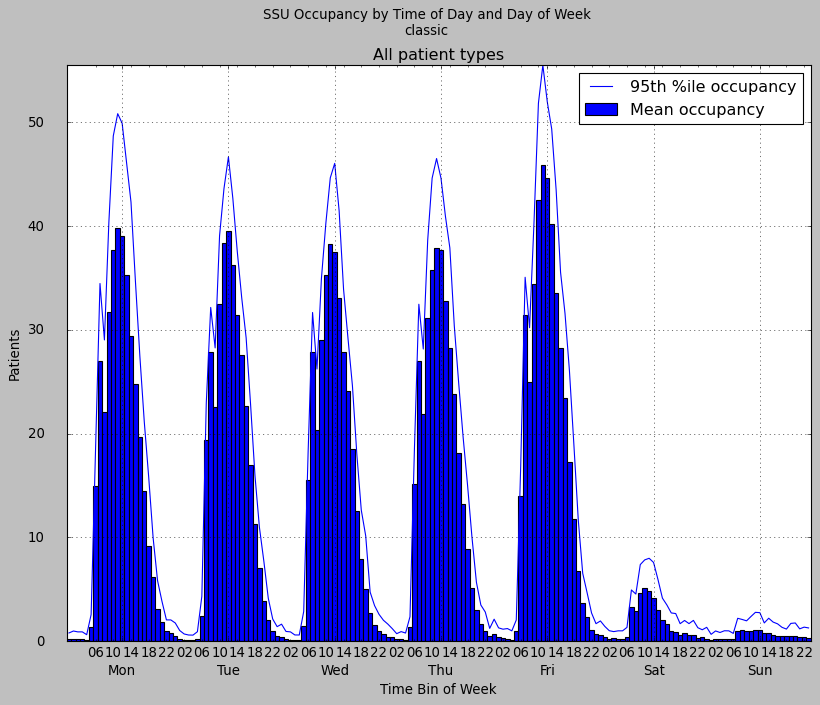

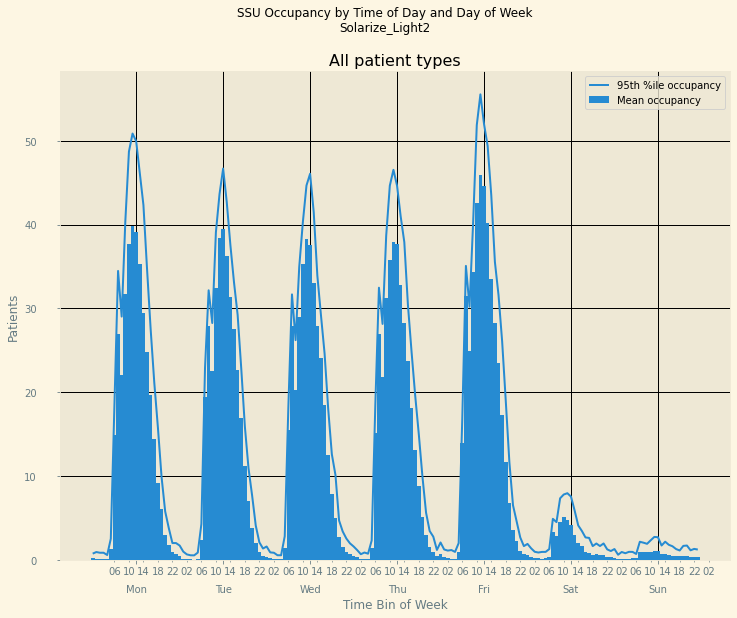

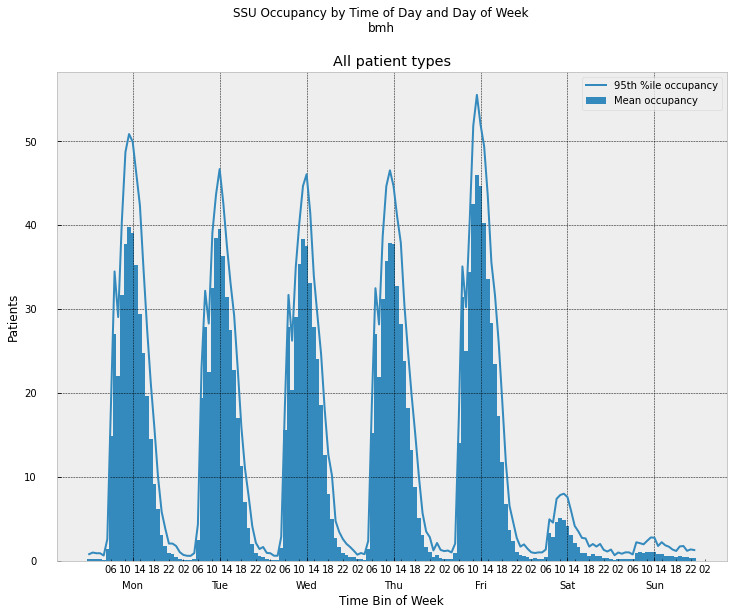

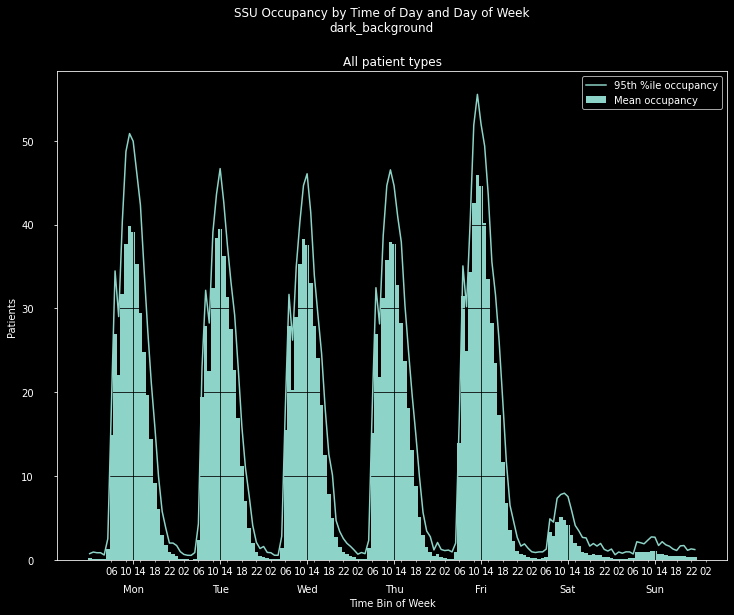

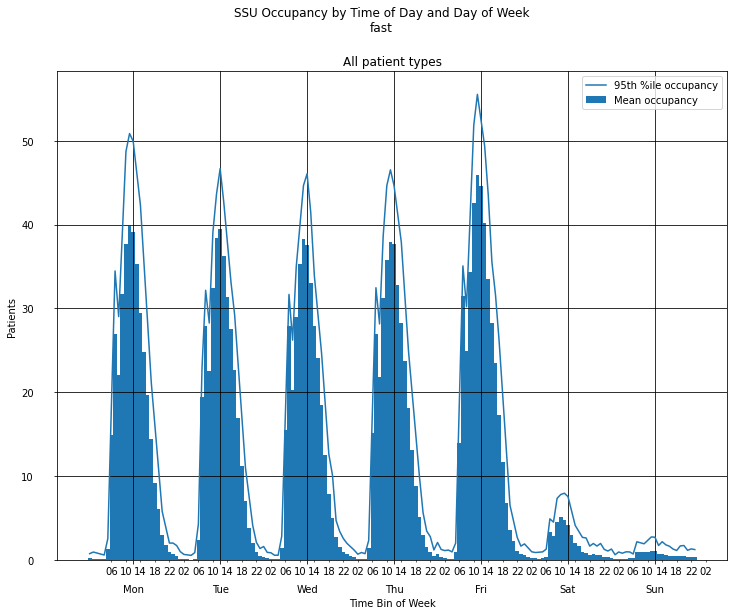

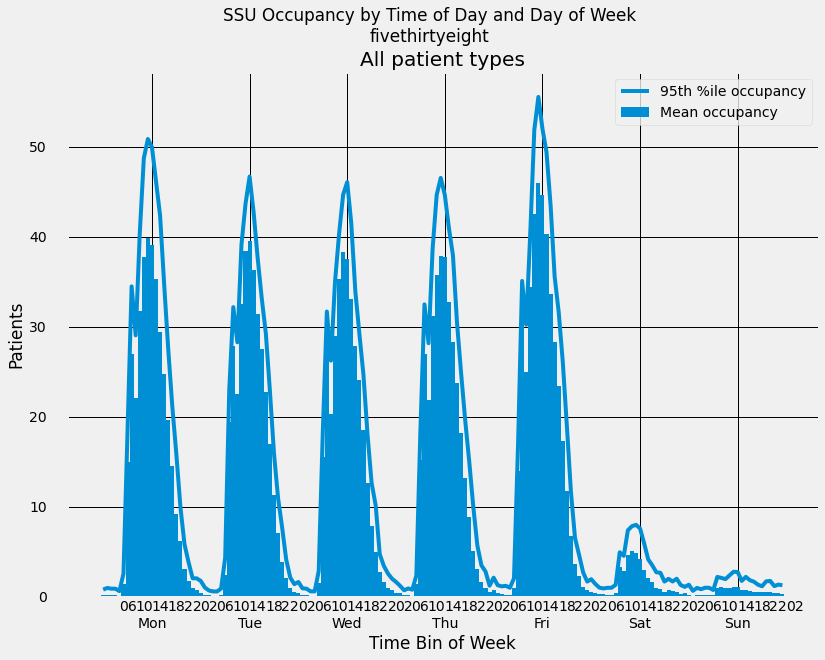

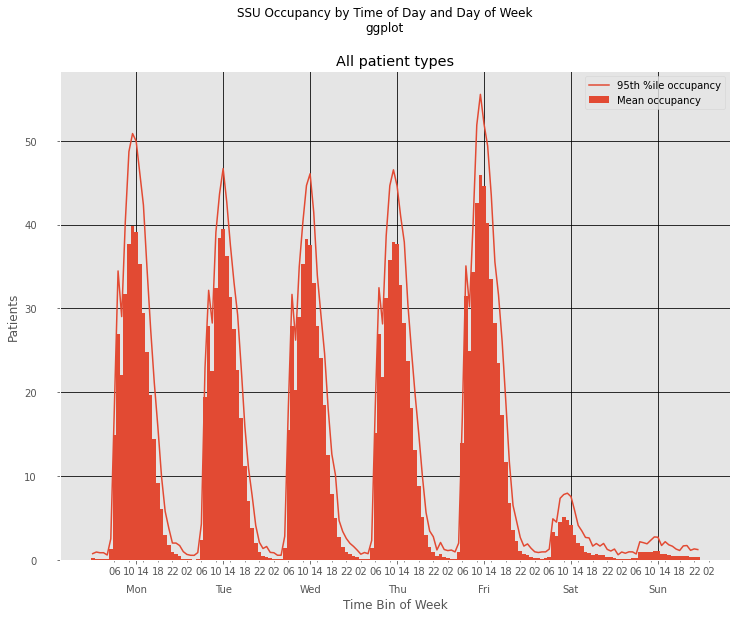

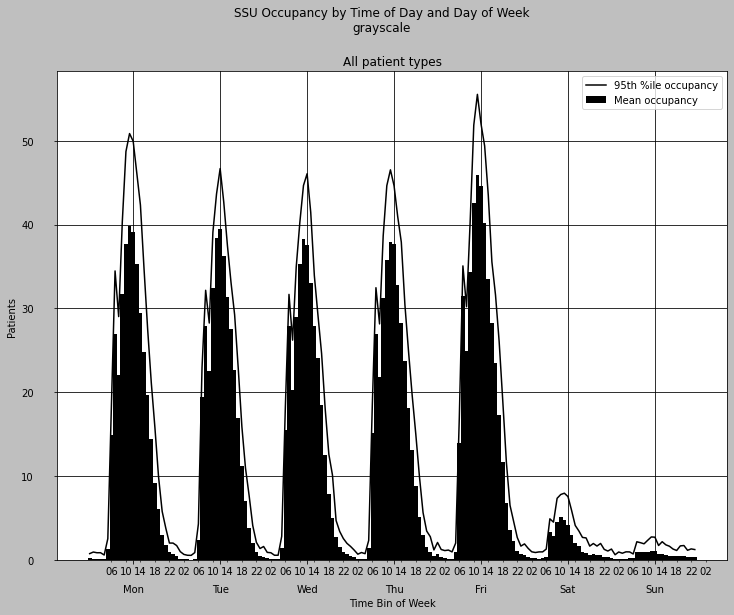

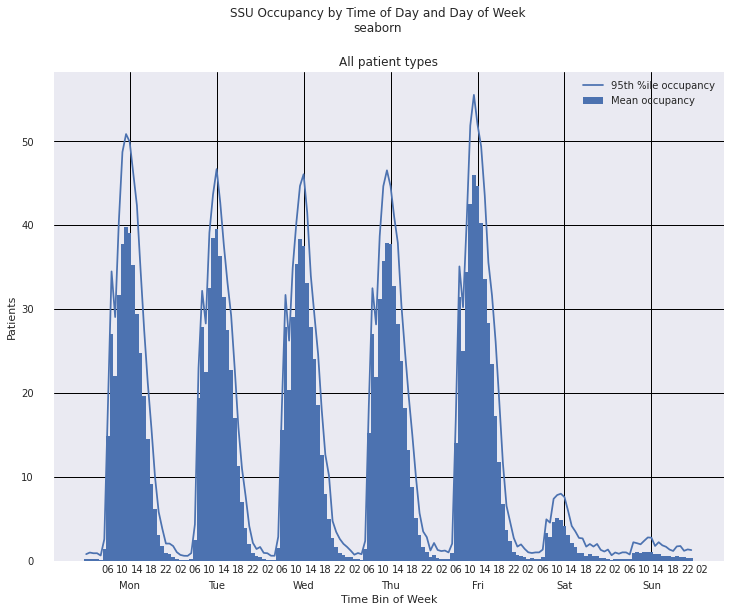

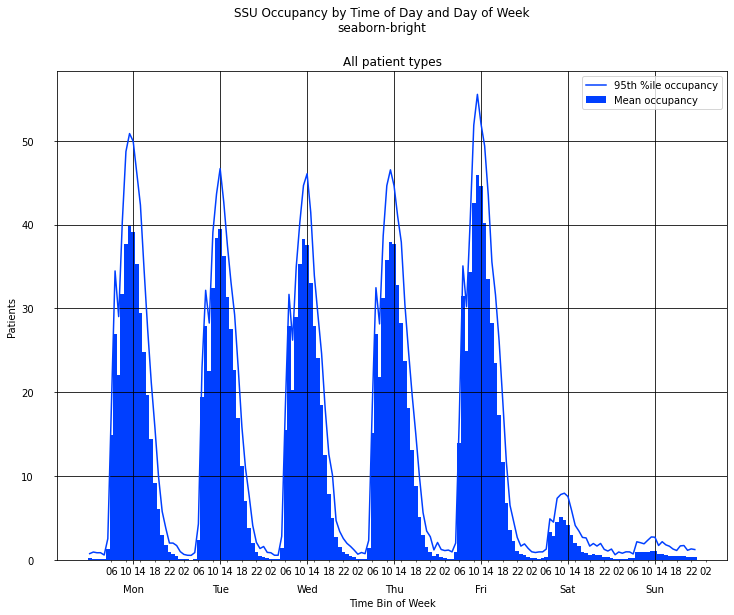

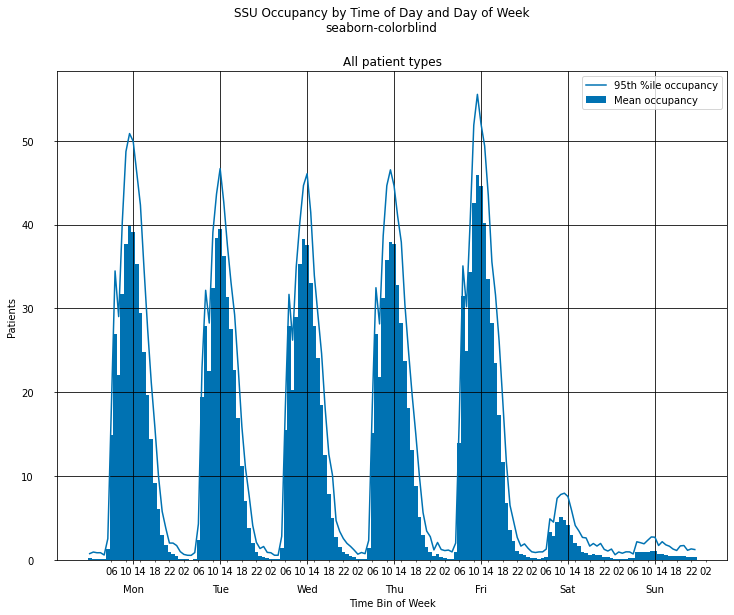

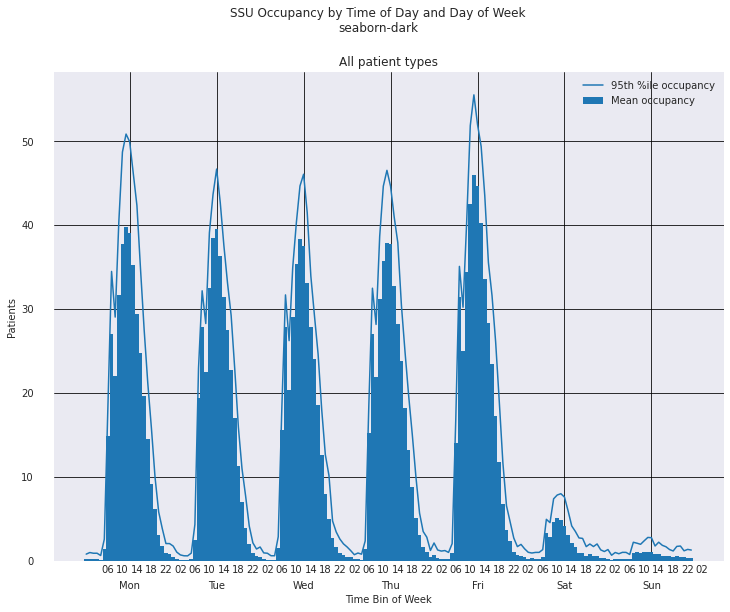

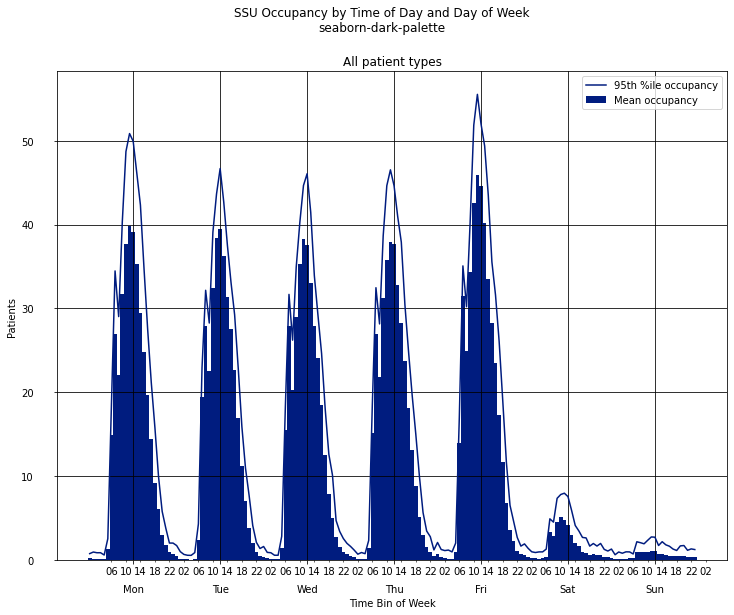

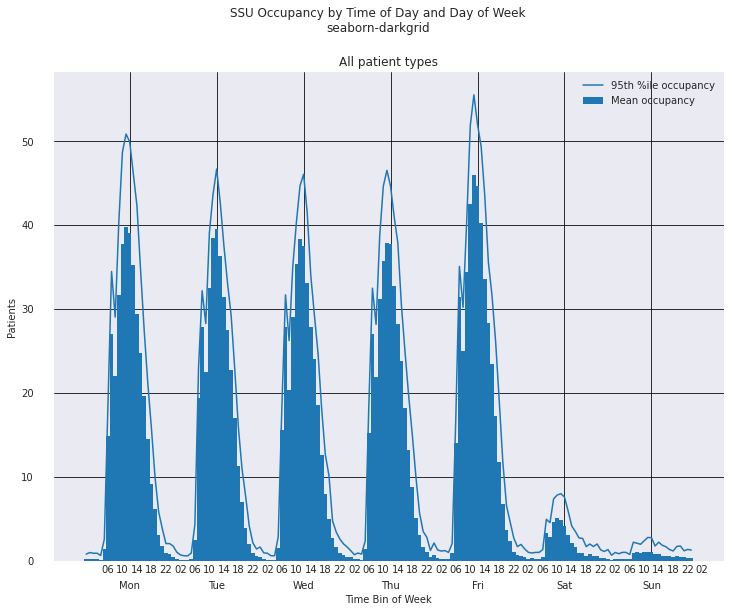

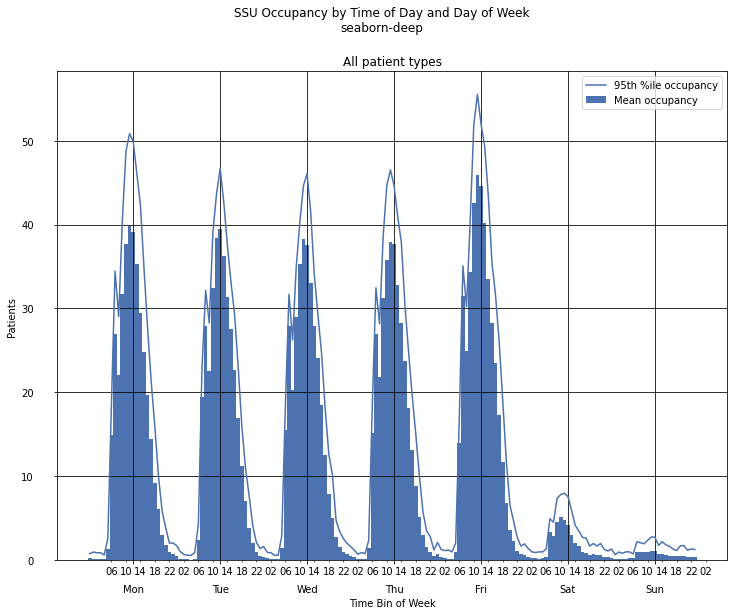

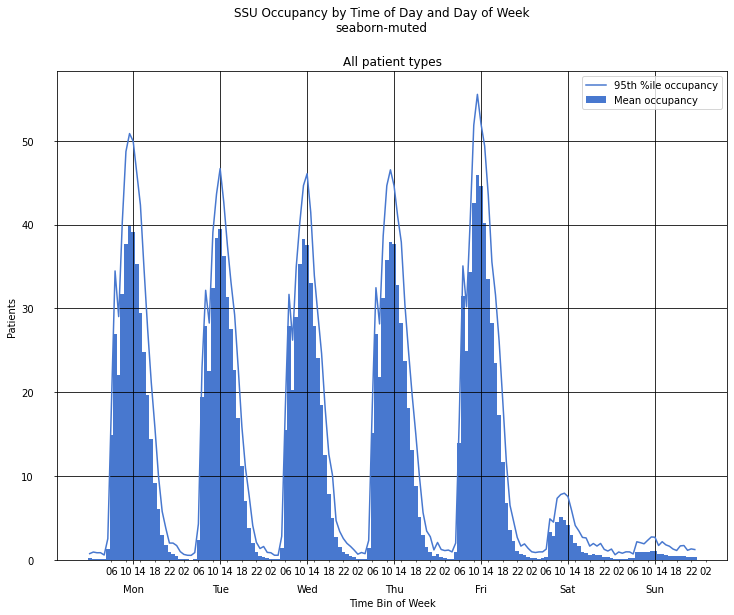

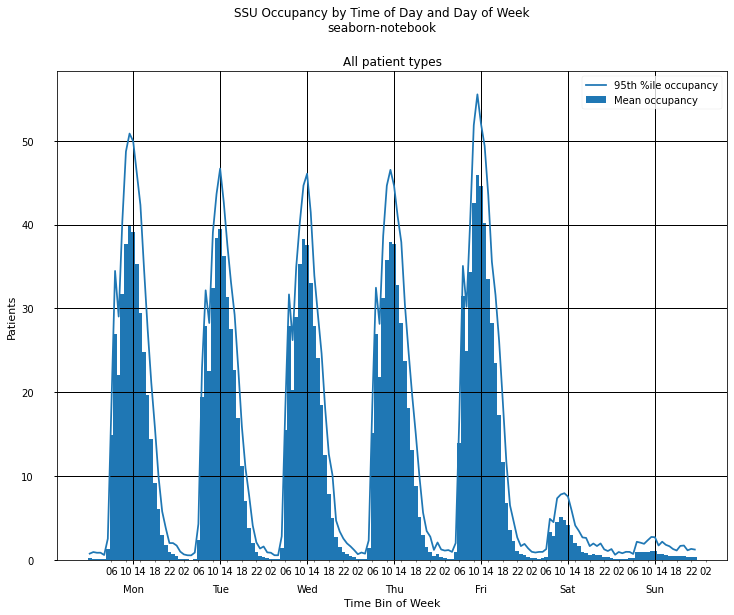

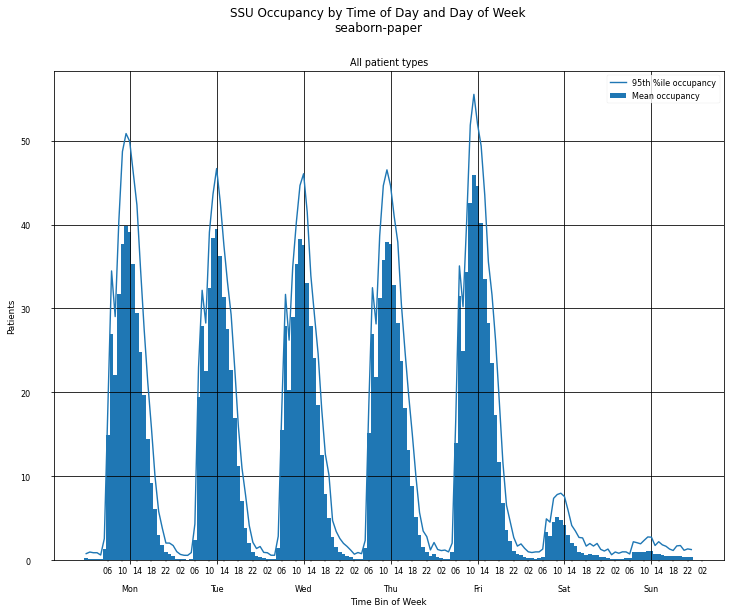

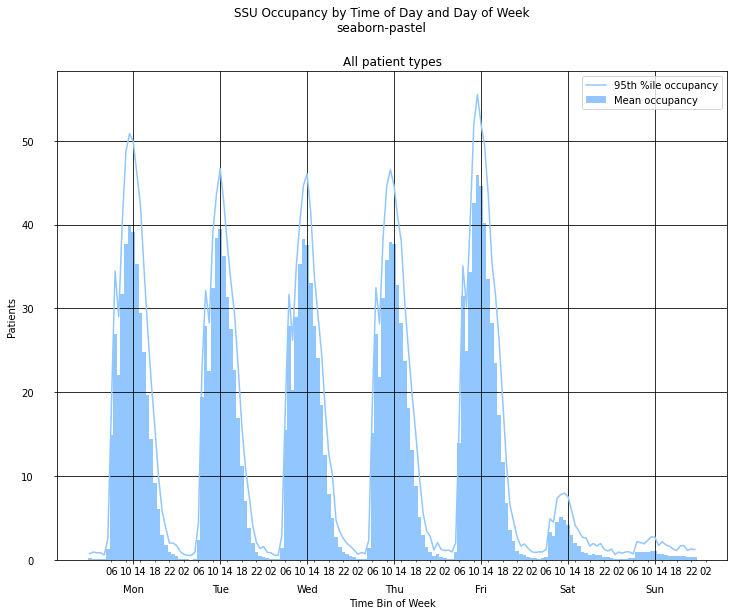

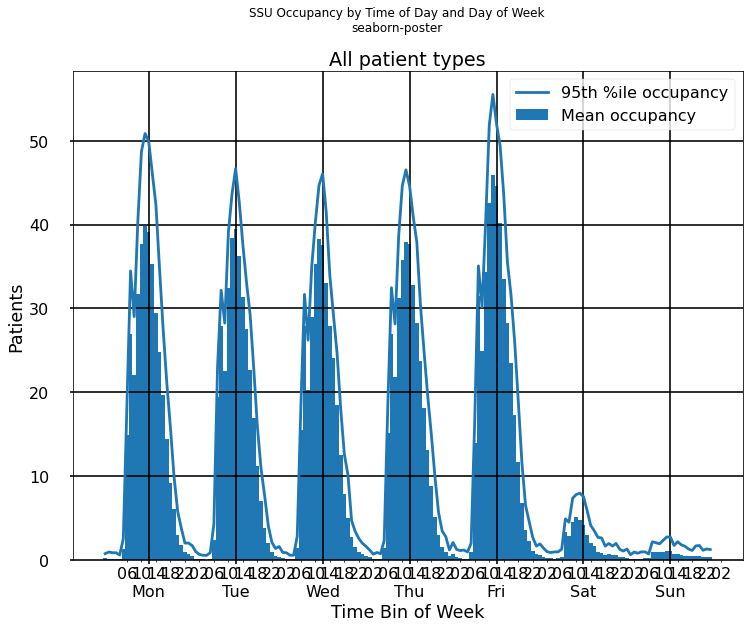

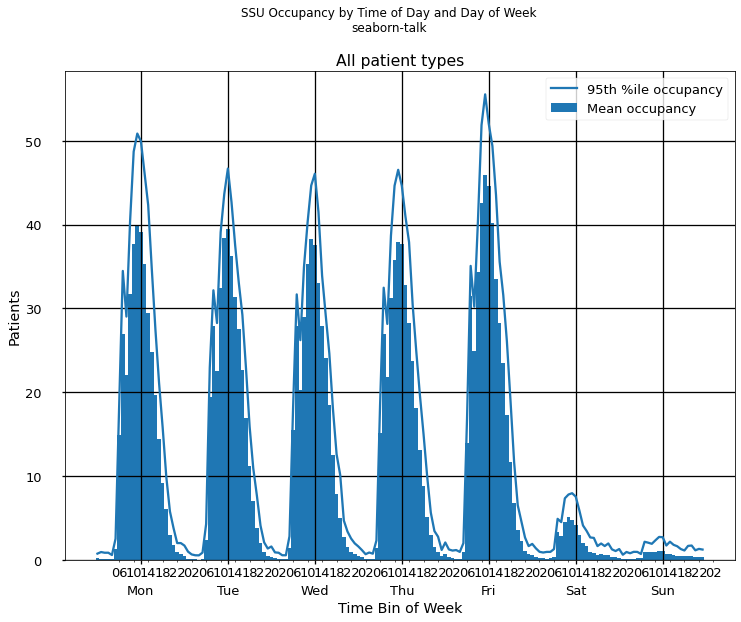

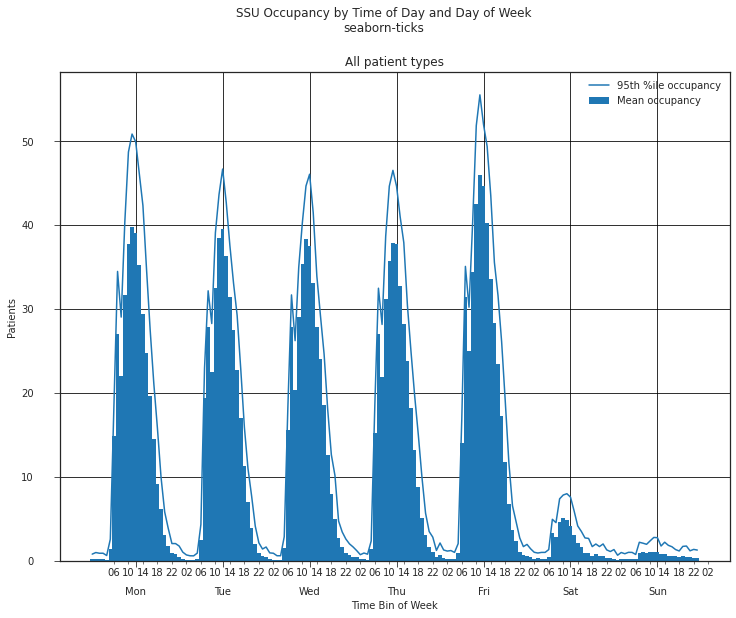

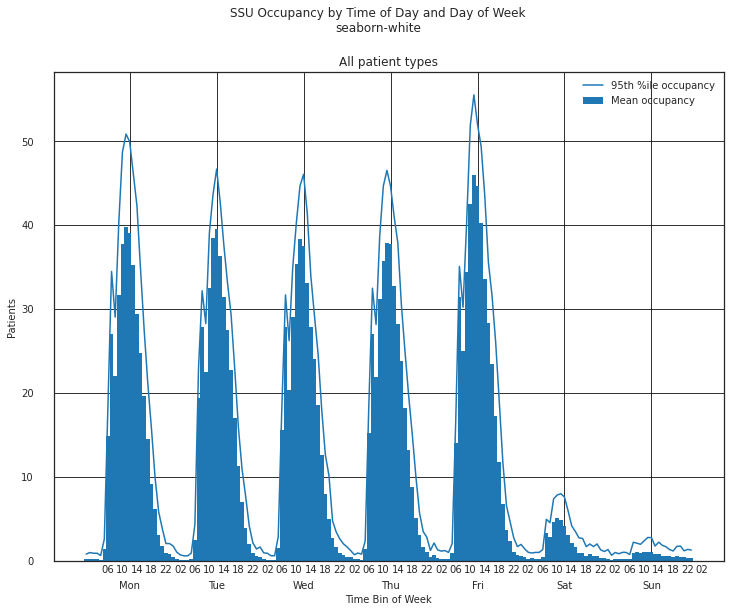

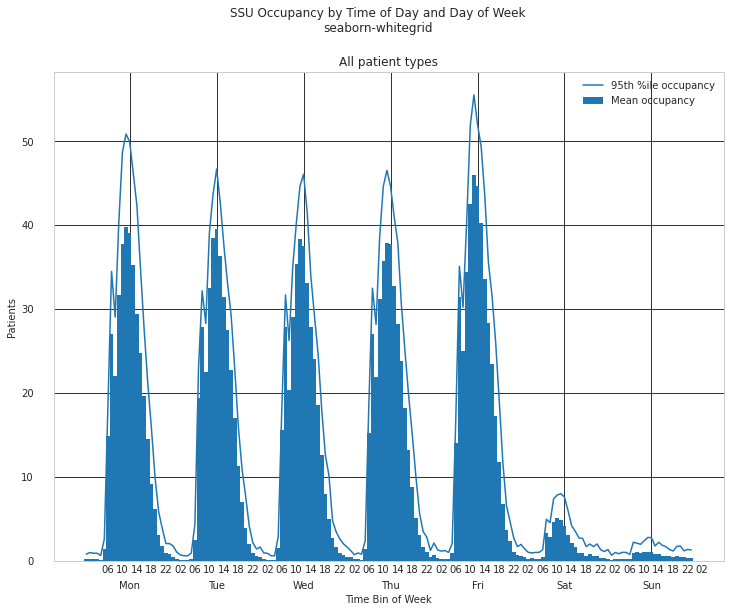

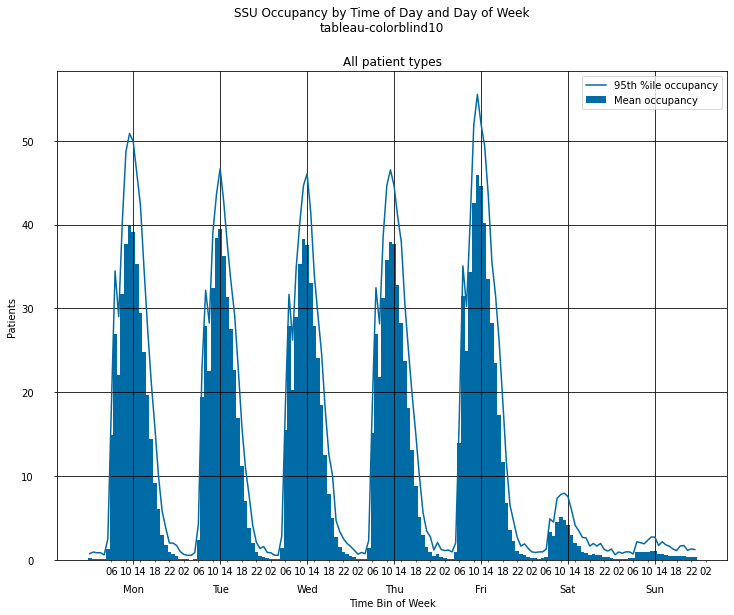

In [17]:
# Plot a demonstration figure for every available style sheet.
for style_label in style_list:
    with plt.rc_context({"figure.max_open_warning": len(style_list)}):
        with plt.style.context(style_label):
            make_occ_plot(occ_summary, style_label=style_label)

plt.show()